# Decision Tree-Based Iris Species Predictor

In [1]:
# 1️ Import Required Libraries

import pandas as pd                                  # Helps work with data in table (DataFrame) format
import numpy as np                                   # Used for numerical operations (arrays, calculations)
import matplotlib.pyplot as plt                      # Used for plotting graphs and visualizations
from sklearn.datasets import load_iris               # Loads the Iris dataset from sklearn
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model + tree visualization
from sklearn.metrics import classification_report, accuracy_score  # Evaluation metrics
from matplotlib.colors import ListedColormap          # Colors for decision boundary plot

In [2]:
# 2️ Load the Iris Dataset

iris = load_iris()                  # Load the built-in Iris dataset
X = iris.data                       # Extract feature matrix (4 features per flower)
y = iris.target                     # Extract target labels (0=setosa, 1=versicolor, 2=virginica)

feature_names = iris.feature_names   # Store the feature names for reference

In [3]:
# 3️ Display Dataset Information

print("Feature Names:", feature_names)
# Prints: ['sepal length', 'sepal width', 'petal length', 'petal width']

print("\nDataset Preview:\n", pd.DataFrame(X, columns=feature_names).head())
# Converts feature data into a DataFrame and prints the first 5 rows
# Helps to understand what the data looks like before training the model


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Dataset Preview:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# 4️ Split the dataset into Training and Testing sets

# test_size=0.3 → 30% of the data will be used for testing.
# random_state=42 → ensures the same split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
# 5️ Train the Decision Tree Model

# criterion='gini' → decision tree uses Gini impurity to split nodes
# max_depth=4 → limits the depth of the tree to prevent overfitting
# random_state=42 → reproducible results
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

clf.fit(X_train, y_train)     # Train the model using training data



DecisionTreeClassifier(max_depth=4, random_state=42)

In [6]:
# 6️ Make Predictions and Calculate Accuracy

y_pred = clf.predict(X_test)          # Predict class labels for the test set
acc = accuracy_score(y_test, y_pred)  # Compute accuracy score
print(f"\nAccuracy: {acc:.2f}")       # Display accuracy (0.00 to 1.00 format)


Accuracy: 1.00


 * This code predicts the flower classes for the test data using the trained model and then calculates the accuracy to show how correctly the Decision Tree classified the samples.

In [7]:
# 7️ Classification Report (Per Class)

# output_dict=True → returns the report as a dictionary instead of plain text.
report = classification_report(y_test, y_pred, output_dict=True)

print("\nClassification Report (Per Class Only):")
report   # Shows precision, recall, f1-score for each iris class


Classification Report (Per Class Only):


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 45.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 45.0}}

* The classification report shows how well the model performs for each flower class by displaying precision, recall, F1-score, and support. It helps understand the model’s accuracy for Setosa, Versicolor, and Virginica individually.

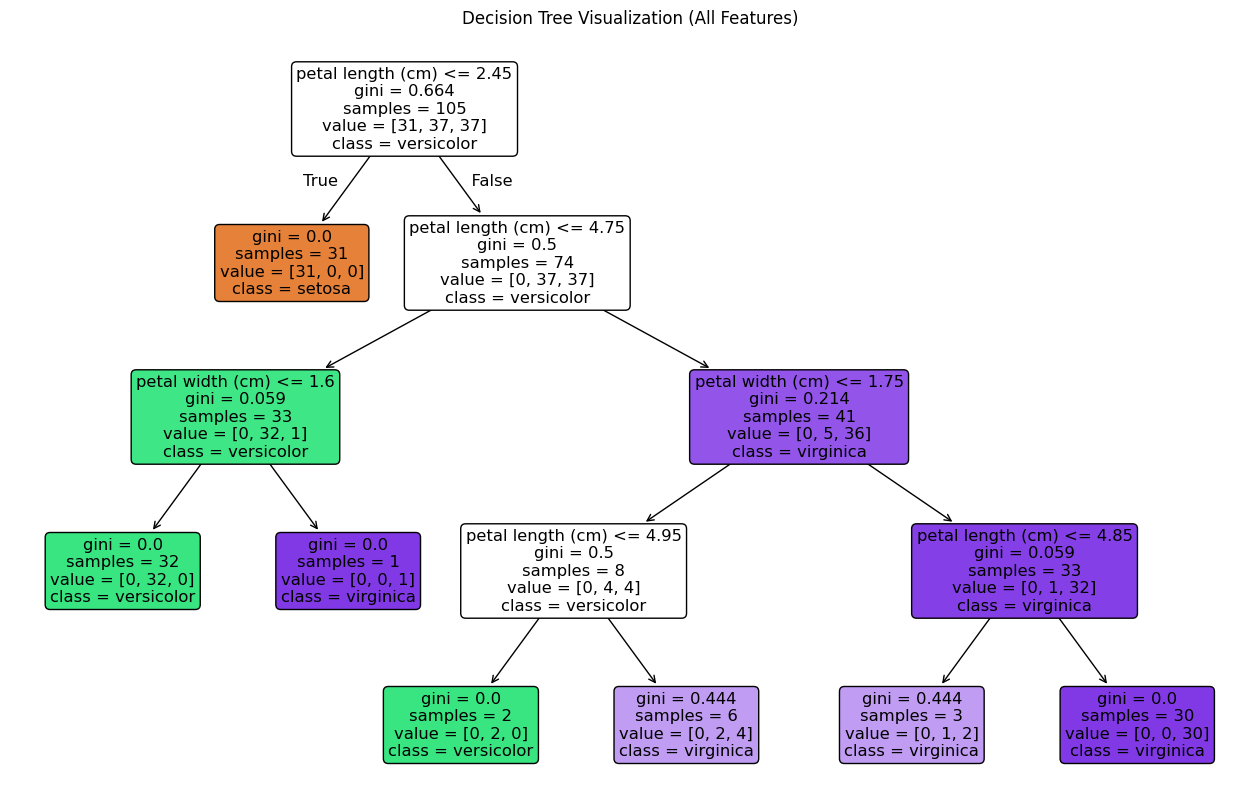

In [8]:
# 8️ Visualize the Decision Tree

# Create a large figure to display the complete tree clearly
plt.figure(figsize=(16, 10))

# plot_tree() draws the structure of the trained decision tree
plot_tree(
    clf,                          # The trained decision tree model
    filled=True,                  # Color nodes based on the class
    feature_names=feature_names,  # Names of the four Iris features
    class_names=iris.target_names, # ['setosa', 'versicolor', 'virginica']
    rounded=True                  # Rounded corners for readability
)

# Title for the plot
plt.title("Decision Tree Visualization (All Features)")

# Show the final tree diagram
plt.show()

**Observations**

* The tree shows how the model splits the data based on feature values.

* Each internal node represents a decision condition that separates flower classes.

* Colors indicate which class the node mostly belongs to.

* Leaf nodes represent the final predicted class after all splits.

* The full tree structure helps understand how the model classifies Setosa, Versicolor, and Virginica.